### Defining constants

In [94]:
NUM_RANGE = (0,9)

In [95]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download training data from open datasets.
training_data_atoms = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data_atoms = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


In [49]:
training_data_atoms[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

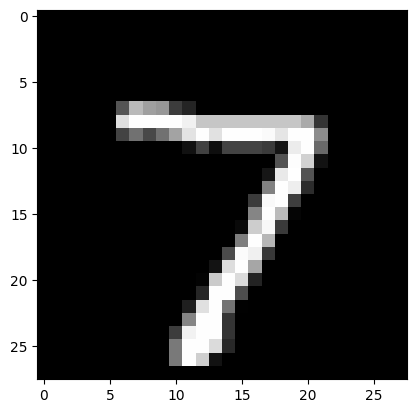

In [96]:
import matplotlib.pyplot as plt
img, label = test_data_atoms[0]
print(test_data_atoms[0])
plt.imshow(img[0], cmap="gray")
plt.show()

### separate images by digit labels

In [97]:
test_digits= [[] for i in range(10)]
for img, label in test_data_atoms:
    test_digits[label]+=img
train_digits= [[] for i in range(10)]
for img, label in training_data_atoms:
    train_digits[label]+=img


In [98]:
for i in range(10):
    print(len(train_digits[i]))

5923
6742
5958
6131
5842
5421
5918
6265
5851
5949


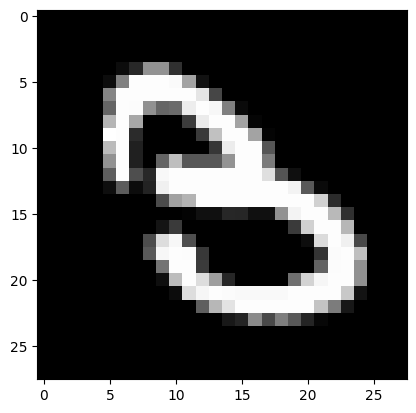

In [91]:
plt.imshow(test_digits[3][0], cmap="gray")
plt.show()

### Generate the set of five numbers, and a dataset of sets consisting five images

In [120]:
import random

def generate_num_set(n):
    small = max(n-NUM_RANGE[1],0)
    big = min(NUM_RANGE[1],n - small)
    num1 = random.randint(small,big)
    num2 = random.randint(small,big)
    num3 = random.randint(small,big)
    return (num1,n-num1,num2,n-num2,num3,n-num3)

def generate_train_data_point(numbers):
    data_point = [random.choice(train_digits[numbers[i]]) for i in range(5)]
    return (torch.cat(data_point),numbers[5])

def generate_test_data_point(numbers):
    data_point = torch.cat([random.choice(test_digits[numbers[i]]) for i in range(5)], 0)
    return (data_point,numbers[5])

In [131]:
x = torch.randn(2, 3)
torch.cat([x[None,:,:] for i in range(5)], 0)

tensor([[[-0.6425, -0.7890, -1.0330],
         [ 0.9182, -0.5349,  0.2251]],

        [[-0.6425, -0.7890, -1.0330],
         [ 0.9182, -0.5349,  0.2251]],

        [[-0.6425, -0.7890, -1.0330],
         [ 0.9182, -0.5349,  0.2251]],

        [[-0.6425, -0.7890, -1.0330],
         [ 0.9182, -0.5349,  0.2251]],

        [[-0.6425, -0.7890, -1.0330],
         [ 0.9182, -0.5349,  0.2251]]])

In [112]:
test_digits[1][0].shape

torch.Size([28, 28])

In [124]:
training_data=[]
for i in range(60000):
    total = random.randint(4,16)
    num = generate_num_set(total)
    training_data += [generate_train_data_point(num)]
    
test_data=[]
for i in range(10000):
    total = random.randint(4,16)
    num = generate_num_set(total)
    test_data += [generate_test_data_point(num)]
    

In [125]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [117]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)


### model when input is 5 channels

In [148]:
def generate_train_data_point(numbers):
    data_point = [random.choice(train_digits[numbers[i]])[None,:,:] for i in range(5)]
    return (torch.cat(data_point),numbers[5])

def generate_test_data_point(numbers):
    data_point = [random.choice(test_digits[numbers[i]])[None,:,:] for i in range(5)]
    return (torch.cat(data_point),numbers[5])

training_data=[]
for i in range(60000):
    total = random.randint(4,16)
    num = generate_num_set(total)
    training_data += [generate_train_data_point(num)]
    
test_data=[]
for i in range(10000):
    total = random.randint(4,16)
    num = generate_num_set(total)
    test_data += [generate_test_data_point(num)]

In [141]:
training_data[0][0].shape

torch.Size([5, 28, 28])

In [149]:
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
    
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(5, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            # print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

### one channel normal network

In [127]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28*5, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [ ]:
model = NeuralNetwork().to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            # print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

### see results

In [150]:

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

# torch.save(model.state_dict(), "model.pth")
# print("Saved PyTorch Model State to model.pth")

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 9.9%, Avg loss: 2.301574 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 13.1%, Avg loss: 2.296835 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 13.1%, Avg loss: 2.292904 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 13.1%, Avg loss: 2.289919 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 13.1%, Avg loss: 2.287944 

Done!
